# Cosas necesarias del principio

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importo librerias y tabla ya limpia, haciendo la copia

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

clean_tabla_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv', index_col=0)
df = clean_tabla_df.copy()
df

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,escuela_id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,tiene_notebook,tiene_pc,tiene_tablet,tiene_celular,tiene_smartphone,tiene_consola,tiene_smarttv,tiene_cable,repeticion_primaria,repeticion_secundaria,nivel_id,year_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,tasa_con_nbi,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,lengua_avanzado,lengua_satisfactorio,lengua_Basico,lengua_Bajo_Basico,sociales_avanzado,sociales_satisfactorio,sociales_Basico,sociales_Bajo_Basico,naturales_avanzado,naturales_satisfactorio,naturales_Basico,naturales_Bajo_Basico,departamento_id,provincia_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
608698.0,540901809,0.0,2.0,satisfactorio,satisfactorio,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.009901,2.0,0,1.0,1.0,0.0,0.104660,0,0,1,1,0.000000,1.162457,0.0,0.000000,0.000000,1.166861,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
457489.0,1152730019,0.0,1.0,por_debajo_del_basico,basico,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.104660,0,0,1,1,0.000000,0.000000,0.0,1.100506,0.000000,0.000000,1.104708,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1563023.0,1145017919,0.0,2.0,NaN,NaN,NaN,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,0,0,0.267,0.0,1.816327,1.0,0,1.0,2.0,0.0,0.104660,1,1,1,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.537383,0.0,0.000000,0.0,0.0
1795162.0,1022298417,0.0,1.0,NaN,NaN,basico,por_debajo_del_basico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,2017,0,0,0.442,1.0,1.865169,1.0,0,0.0,2.0,0.0,0.104660,1,1,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.169184,0.0,0.000000,0.000000,0.0,1.166764,0.0,0.0
508042.0,1152730019,0.0,1.0,satisfactorio,avanzado,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.104660,0,0,1,1,0.000000,1.100506,0.0,0.000000,1.104708,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973858.0,25204992428,NaN,2.0,avanzado,satisfactorio,avanzado,avanzado,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,3,2016,0,1,-1.000,NaN,2.801980,2.0,0,1.0,1.0,0.0,0.083297,0,0,0,0,1.139511,0.000000,0.0,0.000000,0.000000,1.049554,0.000000,0.0,1.037433,0.0,0.000000,0.0,1.044834,0.000000,0.0,0.000000,250.0,23.0
1060039.0,24302357127,NaN,1.0,por_debajo_del_basico,satisfactorio,avanzado,satisfactorio,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,3,2016,0,1,-1.000,NaN,2.615385,2.0,0,1.0,1.0,0.0,0.083297,0,0,0,0,0.000000,0.000000,0.0,1.488929,0.000000,1.457099,0.000000,0.0,1.355550,0.0,0.000000,0.0,0.000000,1.450546,0.0,0.000000,250.0,23.0
1665267.0,27905229731,0.0,2.0,NaN,NaN,avanzado,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,1,1,-1.000,NaN,2.166667,2.0,0,1.0,1.0,0.0,0.083297,1,1,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.007280,0.0,0.000000,0.0,0.000000,1.008751,0.0,0.000000,250.0,23.0


# Decision Tree (no logre buen accuracy. 67%)

Vamo a ver que sale. Voy a usar indice socioeconomico, internet, y algunas tecnologias




In [3]:
df_dt1=df[df.nivel_id == 3].copy()
df_dt1 = df_dt1[['indice_socioeconomico_medio_cat','tiene_smartphone','mate_nc_na','Mate_avanzado','Mate_satisfactorio','Mate_Basico','Mate_Bajo_Basico']]
df_dt1

,indice_socioeconomico_medio_cat,tiene_smartphone,mate_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico
id,,,,,,,
1037297.0,1.0,1.0,0,0.000000,0.000000,0.000000,1.462675
1014085.0,1.0,1.0,0,0.000000,0.000000,1.462675,0.000000
67702.0,1.0,NaN,0,0.000000,0.000000,0.000000,1.877512
1130145.0,1.0,1.0,0,1.644481,0.000000,0.000000,0.000000
218677.0,2.0,NaN,0,0.000000,0.000000,0.000000,1.468137
...,...,...,...,...,...,...,...
1122927.0,2.0,0.0,0,0.000000,1.104980,0.000000,0.000000
111435.0,2.0,NaN,0,0.000000,1.267878,0.000000,0.000000
973858.0,2.0,1.0,0,1.139511,0.000000,0.000000,0.000000


In [4]:
df_dt1 = df_dt1.replace(-1,np.NaN)
df_dt1.describe()

,indice_socioeconomico_medio_cat,tiene_smartphone,mate_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico
count,670473.000000,287662.000000,680958.000000,680958.000000,680958.000000,680958.000000,680958.000000
mean,1.348335,0.386172,0.175572,0.081781,0.344021,0.348469,0.513070
std,0.716021,0.486872,0.380456,0.357804,0.707903,0.749196,0.876392
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.200755
max,2.000000,1.000000,1.000000,14.339213,22.259783,22.259783,22.259783


In [5]:
df_dt1 = df_dt1.dropna()
df_dt1 = df_dt1[df_dt1['mate_nc_na'] != 1]

In [6]:
df_dt1.describe()

,indice_socioeconomico_medio_cat,tiene_smartphone,mate_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico
count,249674.000000,249674.000000,249674.0,249674.000000,249674.000000,249674.000000,249674.000000
mean,1.342647,0.395724,0.0,0.079635,0.383962,0.460987,0.644310
std,0.729116,0.489007,0.0,0.366539,0.793873,0.887217,1.024177
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.0,0.000000,1.000000,1.003456,1.171339
max,2.000000,1.000000,0.0,14.339213,22.259783,22.259783,22.259783


filtrando los nan me quedan 132.000 datos... quizas con el umap podemos completar despues

agrego columna de aprobacion

In [7]:
def f(row):
  if (row['Mate_avanzado'] !=0) | (row['Mate_satisfactorio'] !=0):
    val = 1 # 1 significa que aprobo
  else:
    val =0 #0 significa bajo del basico
  return val
#def g(row):
#  if (row['repeticion_primaria']==1) | (row['repeticion_primaria']==2) | (row['repeticion_primaria']==3):
#    val = 1
#  else:
#    val = 0
#  return val
df_dt1["aprobacion"] = df_dt1.apply(f,axis=1)
#df_dt1["repite"] = df_dt1.apply(g,axis=1)
df_dt1

,indice_socioeconomico_medio_cat,tiene_smartphone,mate_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,aprobacion
id,,,,,,,,
1037297.0,1.0,1.0,0,0.000000,0.00000,0.000000,1.462675,0
1014085.0,1.0,1.0,0,0.000000,0.00000,1.462675,0.000000,0
1130145.0,1.0,1.0,0,1.644481,0.00000,0.000000,0.000000,1
1047308.0,1.0,0.0,0,0.000000,0.00000,1.401730,0.000000,0
1206413.0,1.0,1.0,0,0.000000,0.00000,1.522667,0.000000,0
...,...,...,...,...,...,...,...,...
1000351.0,2.0,1.0,0,0.000000,0.00000,1.424193,0.000000,0
1122927.0,2.0,0.0,0,0.000000,1.10498,0.000000,0.000000,1
973858.0,2.0,1.0,0,1.139511,0.00000,0.000000,0.000000,1


separo variable dependiente de variable independiente

In [8]:
X = df_dt1.drop(['mate_nc_na','Mate_avanzado','Mate_satisfactorio','Mate_Basico','Mate_Bajo_Basico','aprobacion'], axis=1).copy()
X

,indice_socioeconomico_medio_cat,tiene_smartphone
id,,
1037297.0,1.0,1.0
1014085.0,1.0,1.0
1130145.0,1.0,1.0
1047308.0,1.0,0.0
1206413.0,1.0,1.0
...,...,...
1000351.0,2.0,1.0
1122927.0,2.0,0.0
973858.0,2.0,1.0


hago un one hot encoding de la variable indice socioeconomico,icse_cat y medio, que tienen 3 valores posibles: 0,1,2

In [9]:

X_encoded = pd.get_dummies(X, columns=['indice_socioeconomico_medio_cat'])


#cambio los 1.0 por 1. Por las dudas nomas
def porlasdudas(row):
  if row['tiene_smartphone']==1.0:
    val = 1
  else:
    val = 0
  return val
X_encoded['tiene_smartphone']=X_encoded.apply(porlasdudas,axis=1)
X_encoded

,tiene_smartphone,indice_socioeconomico_medio_cat_0.0,indice_socioeconomico_medio_cat_1.0,indice_socioeconomico_medio_cat_2.0
id,,,,
1037297.0,1,0,1,0
1014085.0,1,0,1,0
1130145.0,1,0,1,0
1047308.0,0,0,1,0
1206413.0,1,0,1,0
...,...,...,...,...
1000351.0,1,0,0,1
1122927.0,0,0,0,1
973858.0,1,0,0,1


In [10]:
y = df_dt1[['aprobacion']].copy()
y

,aprobacion
id,
1037297.0,0
1014085.0,0
1130145.0,1
1047308.0,0
1206413.0,0
...,...
1000351.0,0
1122927.0,1
973858.0,1


ahora el arbolito


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=43)
clf_dt = clf_dt.fit(X_train, y_train)

lo grafico

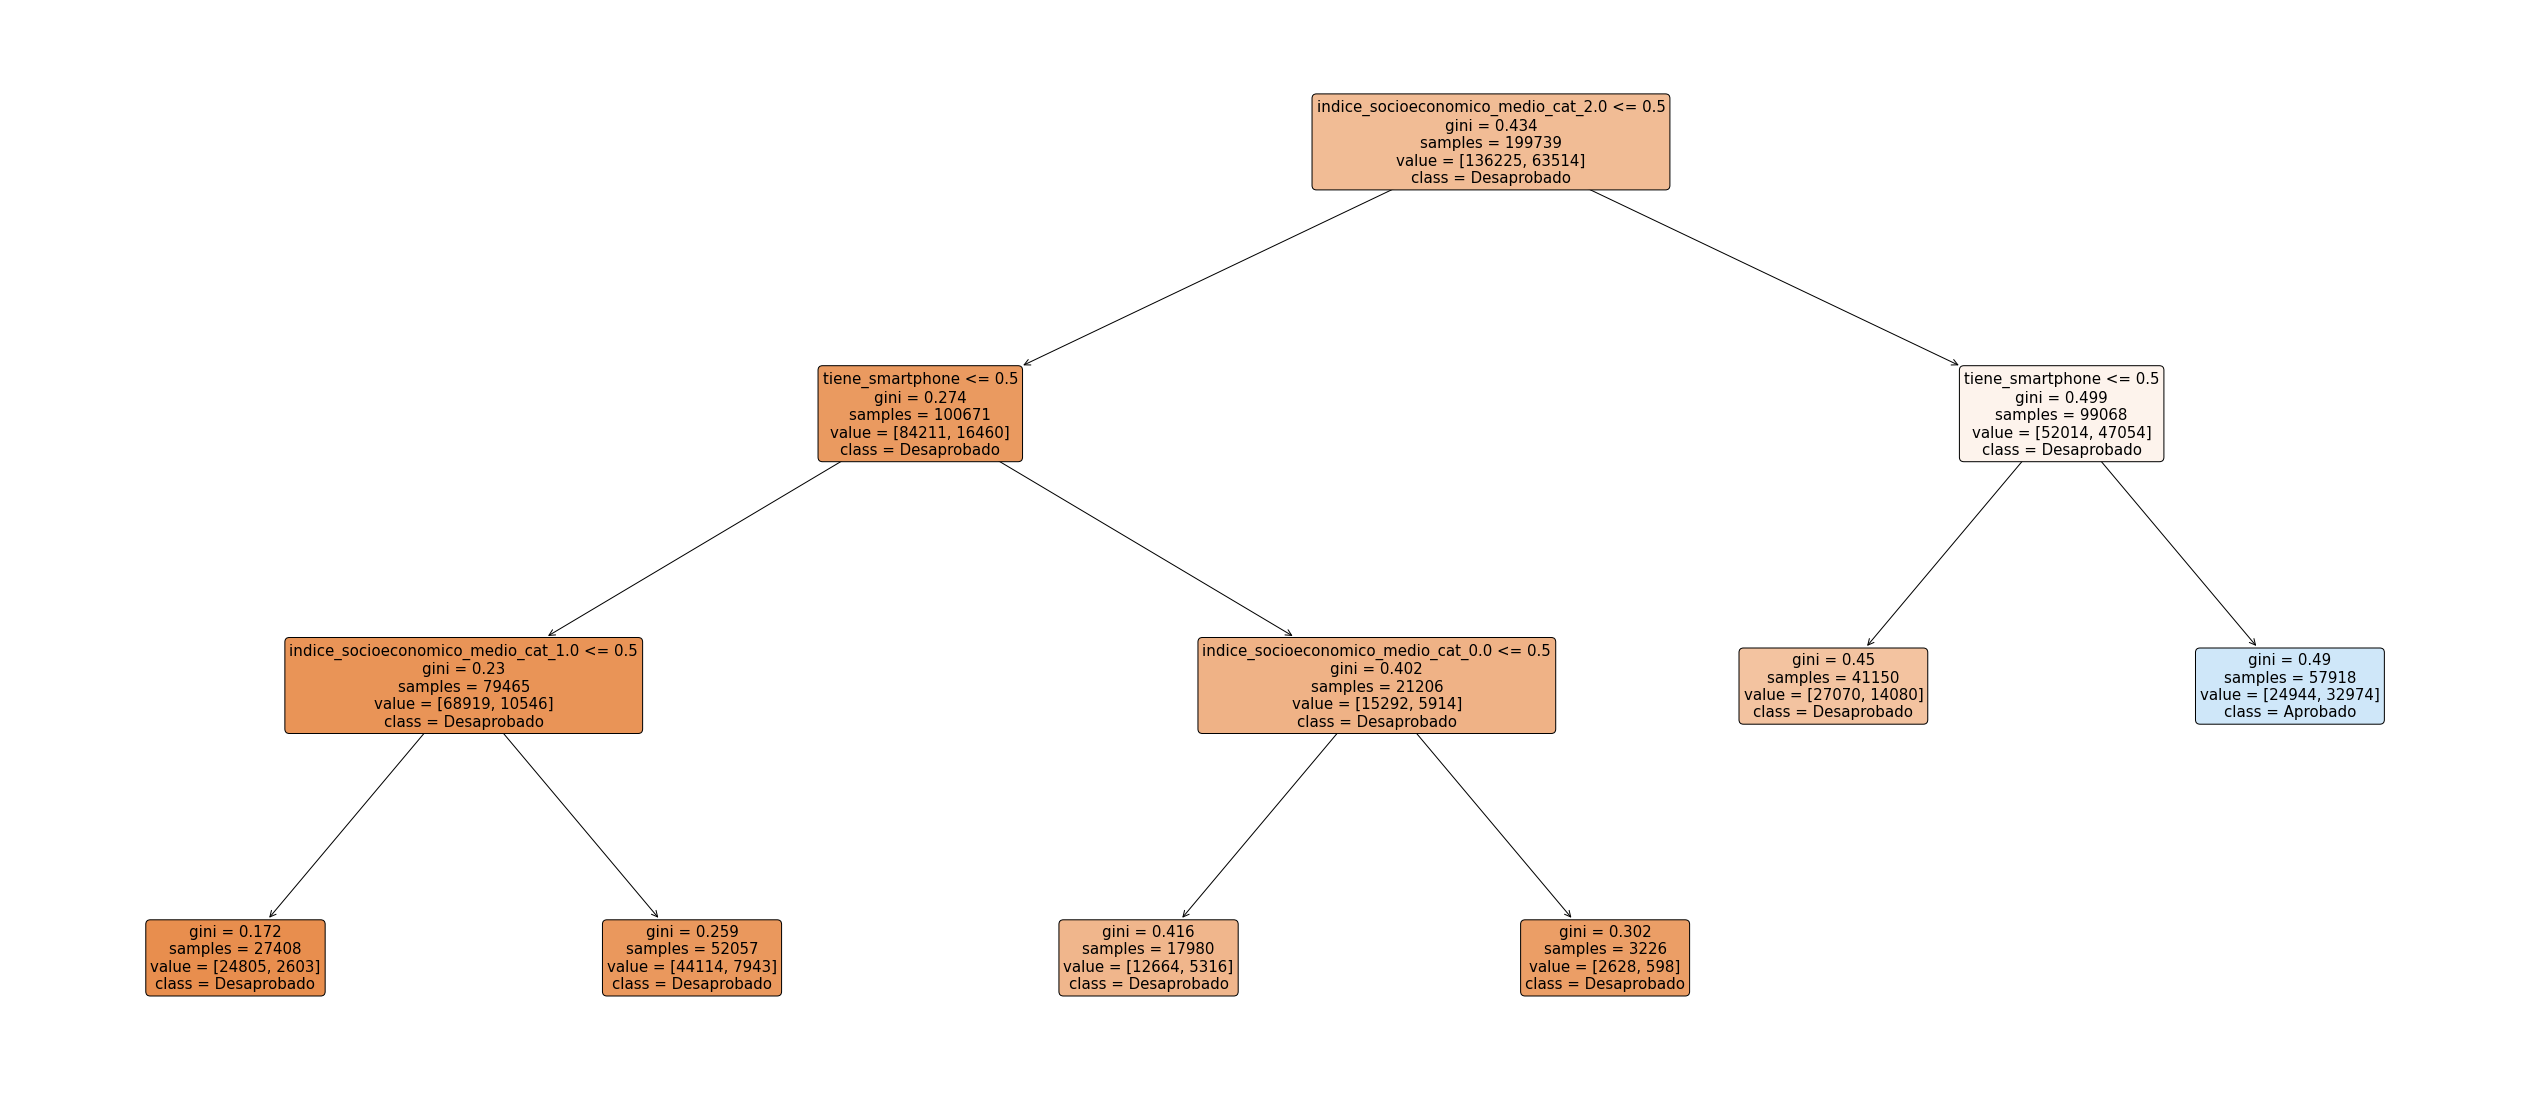

In [12]:
plt.figure(figsize=(45,20))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["Desaprobado", "Aprobado"], feature_names=X_encoded.columns, fontsize=15);

hago la confusion matrix a ver que onda la precision

In [13]:
prediction_test = clf_dt.predict(X_test) #predigo el test

print("Accuracy =", metrics.accuracy_score(y_test, prediction_test)) #comparo la prediccion con el y_test

Accuracy = 0.722098728346851


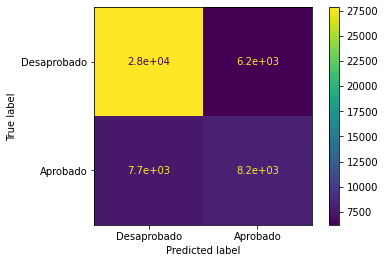

In [14]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Desaprobado","Aprobado"])

vamos a hacer prunning. La idea es graficar el rendimiento del tree en funcion del parametro alpha del modelo.



In [15]:
feature_list = list(X_encoded.columns)
feature_imp= pd.Series(clf_dt.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

indice_socioeconomico_medio_cat_2.0    0.741130
tiene_smartphone                       0.244661
indice_socioeconomico_medio_cat_1.0    0.009118
indice_socioeconomico_medio_cat_0.0    0.005091
dtype: float64


In [16]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine values of alpha
ccp_alphas = path.ccp_alphas #extract values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value

clf_dts = [] #array where we will put the decision trees into

# alphas < 0 arent accepted. Lets fix some possible issues of the future
for i in np.arange(len(ccp_alphas)-1):
  if ccp_alphas[i] < 0:
    ccp_alphas[i] = 0
    
# create one tree per value of alpha and store in the array
for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train, y_train)
  clf_dts.append(clf_dt)

grafico

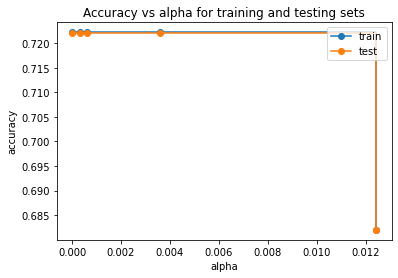

In [17]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()